<h1>Importing libraries </h1>

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

<h1>Data Collection</h1>

In [2]:
train_data = pd.read_csv('fraudTrain.csv', delimiter=',', engine='python')
test_data = pd.read_csv('fraudTest.csv', delimiter=',',  engine='python')
train_data.head()



,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


<h1>Data Exploration and Preprocessing</h1>

In [3]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

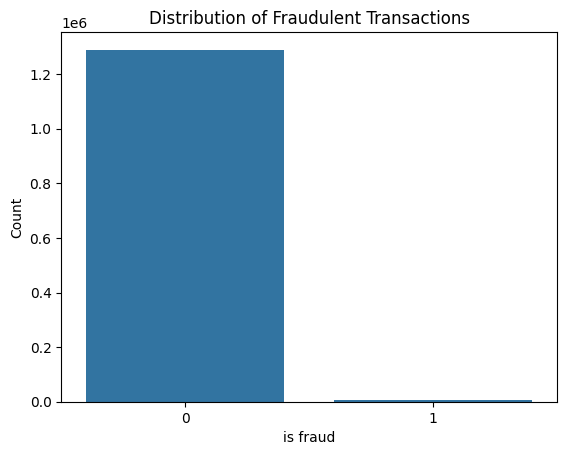

In [6]:
sns.countplot(x='is_fraud', data=train_data)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('is fraud')
plt.ylabel('Count')
plt.show()

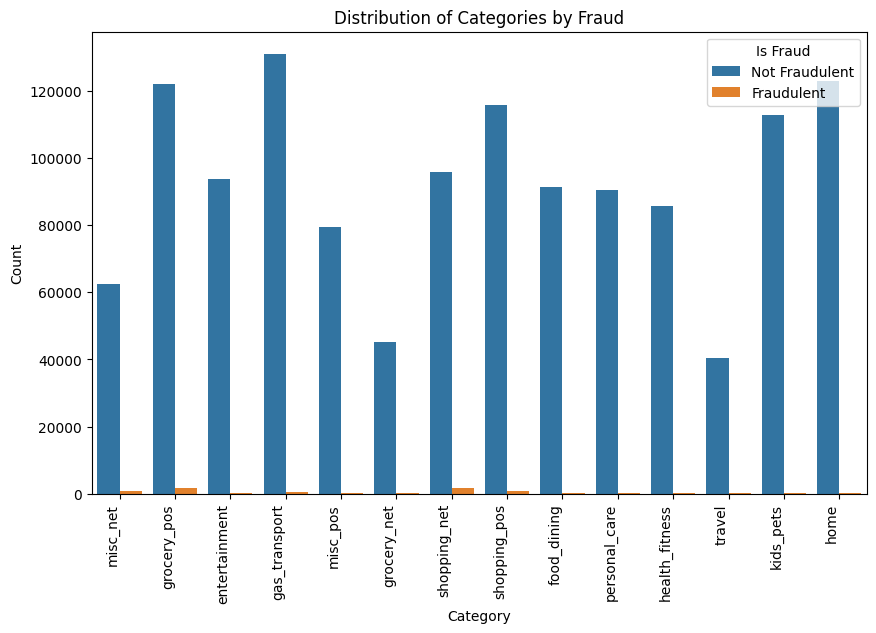

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', hue='is_fraud', data=train_data)
plt.title('Distribution of Categories by Fraud')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90, ha="right")
plt.legend(title='Is Fraud', labels=['Not Fraudulent', 'Fraudulent'])
plt.show()

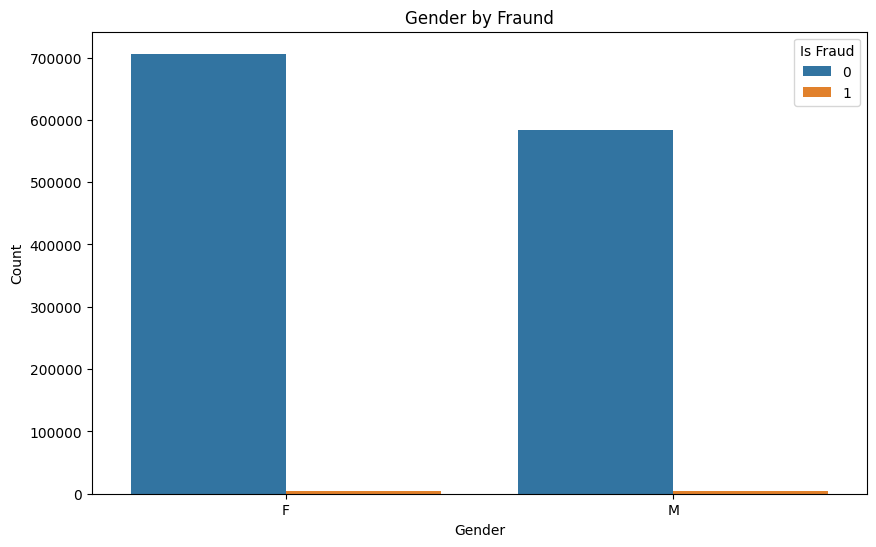

In [8]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'gender', hue ='is_fraud', data = train_data)
plt.title('Gender by Fraund')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title = 'Is Fraud')
plt.show()

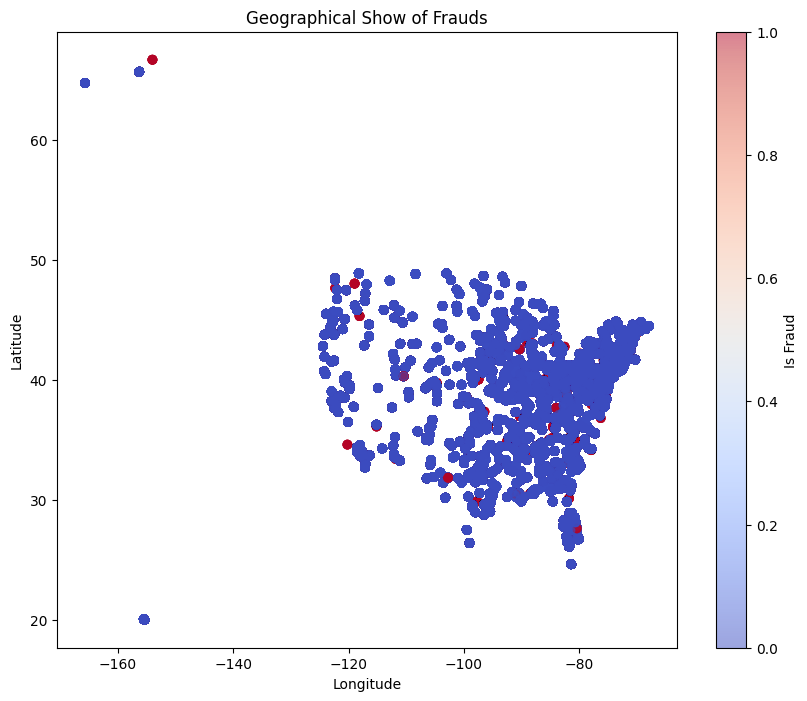

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(train_data['long'],train_data['lat'],c = train_data['is_fraud'],cmap = 'coolwarm',alpha = 0.5)
plt.title("Geographical Show of Frauds")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label = "Is Fraud")
plt.show()

<h1>Feature Engineering</h1>

In [10]:


train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])


train_data.sort_values(by='trans_date_trans_time', inplace=True)


train_data['transaction_frequency'] = train_data.groupby('is_fraud')['trans_date_trans_time'].diff().dt.total_seconds()


train_data['average_transaction_amount'] = train_data.groupby('is_fraud')['amt'].expanding().mean().reset_index(0, drop=True)


train_data['time_since_last_transaction'] = train_data.groupby('is_fraud')['trans_date_trans_time'].diff().dt.total_seconds()


train_data = train_data.drop(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num'], axis=1)


imputer = SimpleImputer(strategy='mean')  
train_data_imputed = pd.DataFrame(imputer.fit_transform(train_data), columns=train_data.columns)


print(train_data_imputed)

         Unnamed: 0     amt      lat      long  city_pop     unix_time  \
0               0.0    4.97  36.0788  -81.1781    3495.0  1.325376e+09   
1               1.0  107.23  48.8878 -118.2105     149.0  1.325376e+09   
2               2.0  220.11  42.1808 -112.2620    4154.0  1.325376e+09   
3               3.0   45.00  46.2306 -112.1138    1939.0  1.325376e+09   
4               4.0   41.96  38.4207  -79.4629      99.0  1.325376e+09   
...             ...     ...      ...       ...       ...           ...   
1296670   1296670.0   15.56  37.7175 -112.4777     258.0  1.371817e+09   
1296671   1296671.0   51.70  39.2667  -77.5101     100.0  1.371817e+09   
1296672   1296672.0  105.93  32.9396 -105.8189     899.0  1.371817e+09   
1296673   1296673.0   74.90  43.3526 -102.5411    1126.0  1.371817e+09   
1296674   1296674.0    4.30  45.8433 -113.8748     218.0  1.371817e+09   

         merch_lat  merch_long  is_fraud  transaction_frequency  \
0        36.011293  -82.048315       0.0    

<h1>Data Splitting</h1>

In [11]:


X =train_data[['transaction_frequency', 'average_transaction_amount', 'time_since_last_transaction']]

y =train_data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)


Training set shape (X_train, y_train): (1037340, 3) (1037340,)
Testing set shape (X_test, y_test): (259335, 3) (259335,)


<h1>Model Selection : Random Forests</h1>

In [18]:

X_train_imputed = imputer.fit_transform(X_train)

X_test_imputed = imputer.transform(X_test)

random_forest_model = RandomForestClassifier(random_state=42)

random_forest_model.fit(X_train_imputed, y_train)

y_train_pred = random_forest_model.predict(X_train_imputed)






<h1>Model Evaluation</h1>

In [19]:
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Accuracy: {:.2f}%".format(accuracy_train * 100))



Accuracy: 100.00%


In [20]:
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("\nConfusion Matrix:")
print(conf_matrix_train)


Confusion Matrix:
[[1031358       0]
 [      0    5982]]


In [21]:
classification_report_train = classification_report(y_train, y_train_pred)
print("\nClassification Report:")
print(classification_report_train)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1031358
           1       1.00      1.00      1.00      5982

    accuracy                           1.00   1037340
   macro avg       1.00      1.00      1.00   1037340
weighted avg       1.00      1.00      1.00   1037340

